In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scape
import katdal
import katpoint
import katsdpscripts
import glob

INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/Grammar.txt
INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/PatternGrammar.txt


In [3]:
print "Scape version: %s"%scape.__version__
print "katdal version: %s"%katdal.__version__
print "katpoint version: %s"%katpoint.__version__
print "katsdpscripts version: %s"%katsdpscripts.__version__

Scape version: 0.1.dev616+master.e836eb2
katdal version: 0.9.6.dev661+master.49bf3f1
katpoint version: 0.8.dev355+master.341001f
katsdpscripts version: 0.1.dev2787+master.784f40e


In [4]:
h5_filename = '/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/03/27/1522168663.h5'
%set_env h5_filename = $h5_filename

env: h5_filename=/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/03/27/1522168663.h5


In [5]:
run -i /var/kat/katsdpscripts/reduction/analyse_interferometric_pointing.py -h

Usage: analyse_interferometric_pointing.py [opts] <HDF5 file>

This processes an HDF5 dataset and extracts fitted beam parameters from the
compound scans in it.

Options:
  -h, --help            show this help message and exit
  -a ANTS, --ants=ANTS  List of antennas to use in the reduction default is
                        all antennas in the data set
  --exclude-ants=EX_ANTS
                        List of antennas to exculde from the reduction default
                        is None of the antennas in the data set
  -c CHANNEL_MASK, --channel-mask=CHANNEL_MASK
                        Optional pickle file with boolean array specifying
                        channels to mask (default is no mask)
  -o OUTFILEBASE, --output=OUTFILEBASE
                        Base name of output files (*.csv for output data and
                        *.log for messages, default is
                        '<dataset_name>_interferometric_pointing')


In [6]:
run -i /var/kat/katsdpscripts/reduction/analyse_interferometric_pointing.py \
-c /var/kat/katsdpscripts/RTS/rfi_mask.pickle  $h5_filename

DEBUG: Found int_time=0.9995771214 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1522163036.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
DEBUG: Added 'PKS 0237-233' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0252-712' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0316+162' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0407-658' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0410-752' [radec] (and 0 aliases)
DEBUG: Added '3C138' [radec] (and 1 aliases)
DEBUG: Added 'PKS 0237-233' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0252-712' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0316+162' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0407-658' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0410-752' [radec] (and 0 aliases)
DEBUG: Added '3C13

/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/var/kat/katsdpscripts/reduction/analyse_interferometric_pointing.py:88: RuntimeWarning: divide by zero encountered in divide
  y_err = 1./np.sqrt(np.array(stdv[pol])[:,freq,:][:,rfi,ant].sum(axis=1))


Valid data obtained from the Compound scan
Compound scan 1 of field PKS 0252-712 
Valid data obtained from the Compound scan
Compound scan 2 of field PKS 0316+162 
Valid data obtained from the Compound scan
Compound scan 3 of field PKS 0407-658 
Valid data obtained from the Compound scan
Compound scan 4 of field PKS 0410-752 
Valid data obtained from the Compound scan
Compound scan 5 of field 3C138 
Valid data obtained from the Compound scan


In [7]:
tmp = h5_filename.split('/')[-1].split('.')[0]
gl = glob.glob("%s*.csv"%tmp)

In [8]:
print h5.antlist

['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm021']


In [9]:
!pwd
for g in sorted(gl):
    print g

/data/Pointing/Interferometric
1522168663_interferometric_pointing_m000.csv
1522168663_interferometric_pointing_m001.csv
1522168663_interferometric_pointing_m002.csv
1522168663_interferometric_pointing_m003.csv
1522168663_interferometric_pointing_m004.csv
1522168663_interferometric_pointing_m005.csv
1522168663_interferometric_pointing_m006.csv
1522168663_interferometric_pointing_m007.csv
1522168663_interferometric_pointing_m010.csv
1522168663_interferometric_pointing_m011.csv
1522168663_interferometric_pointing_m012.csv
1522168663_interferometric_pointing_m013.csv
1522168663_interferometric_pointing_m014.csv
1522168663_interferometric_pointing_m015.csv
1522168663_interferometric_pointing_m016.csv
1522168663_interferometric_pointing_m021.csv


# Delete wildly discepant points

In [10]:
#!sed -i /Nothing/d 1516731881*.csv

In [14]:
# last point badly damaged by RFI 
!sed -i /3C138,\ 2018-03-27\ 17:53/d 1522168663_interferometric_pointing_m0*.csv

In [15]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

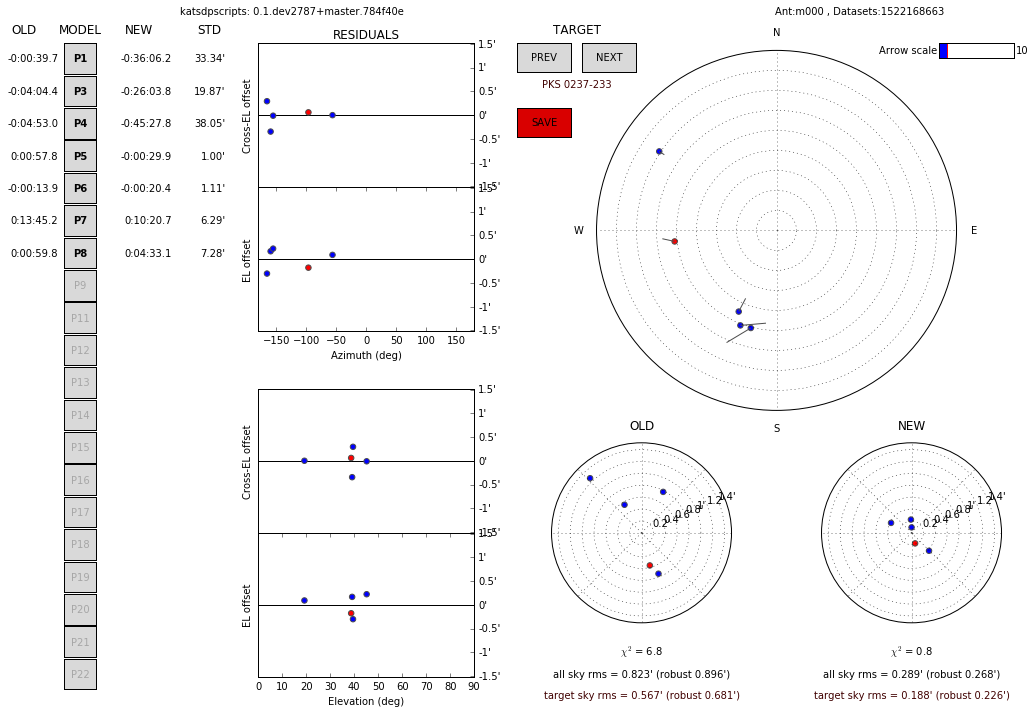

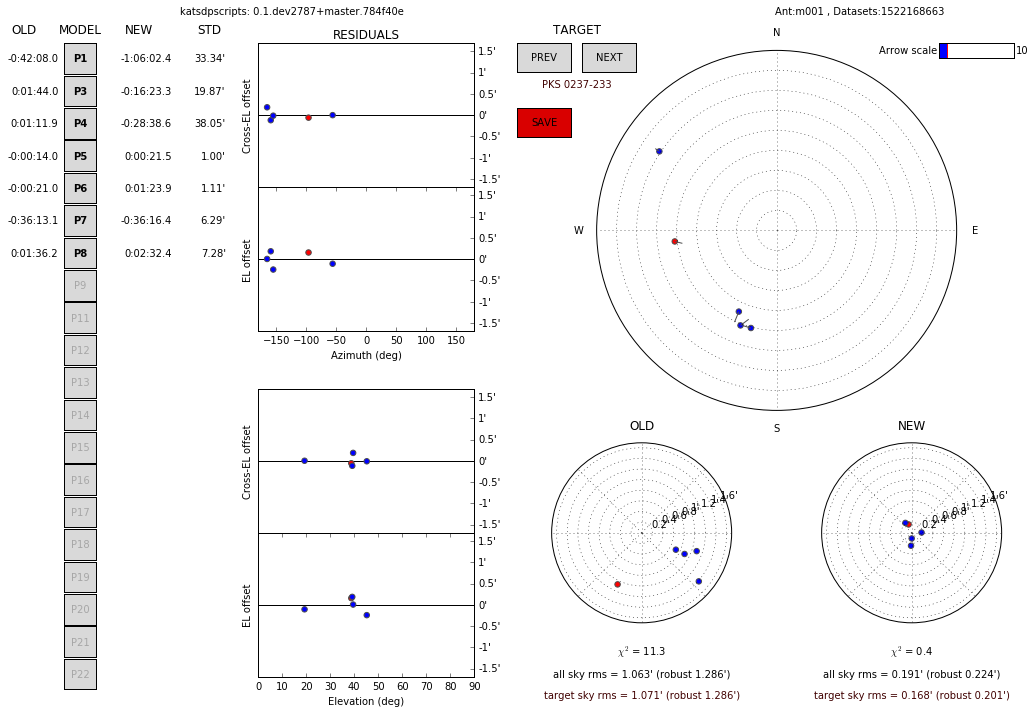

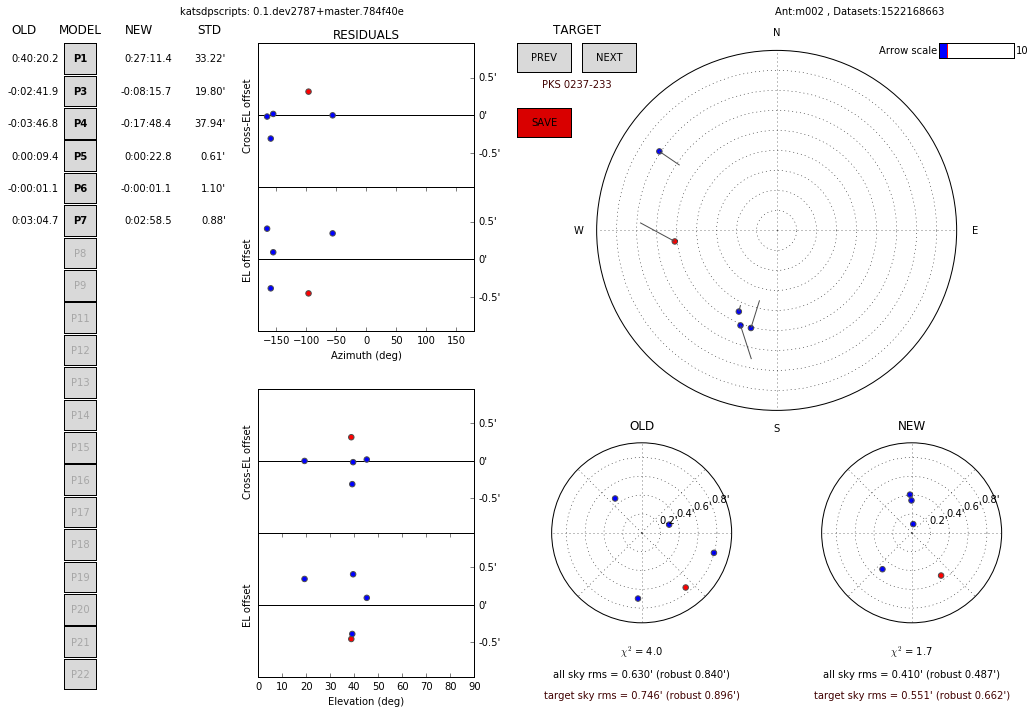

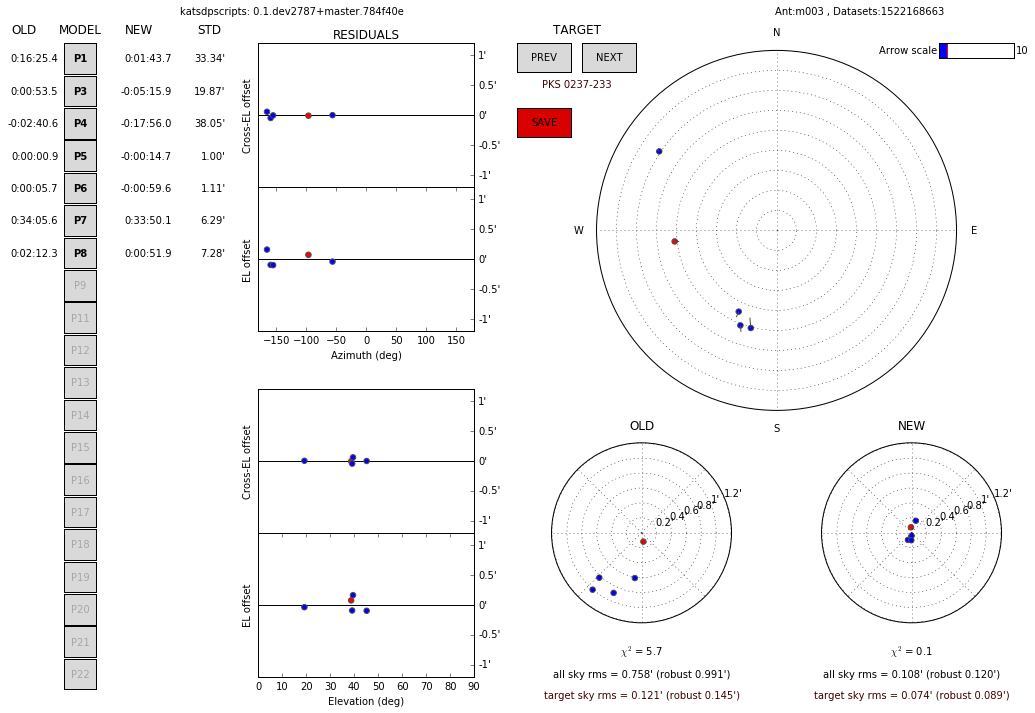

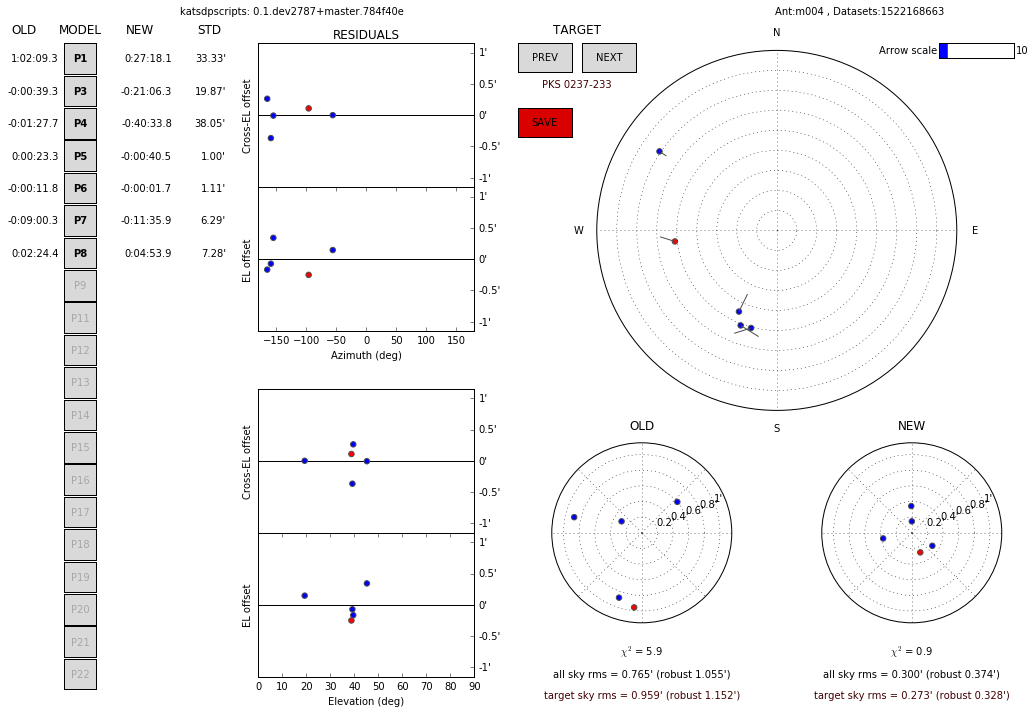

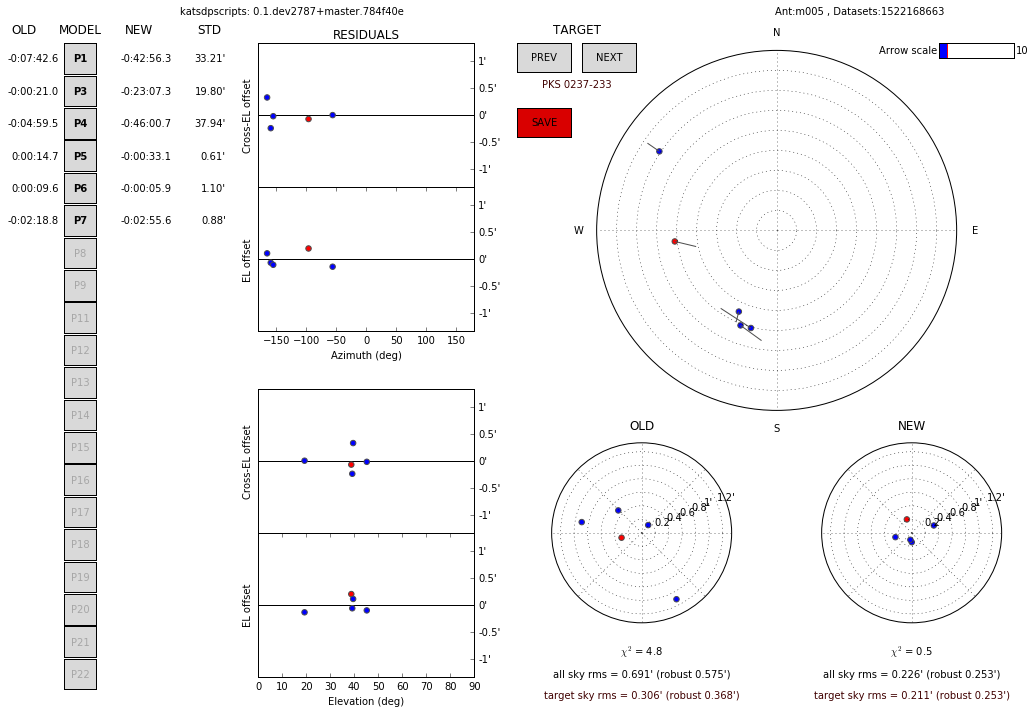

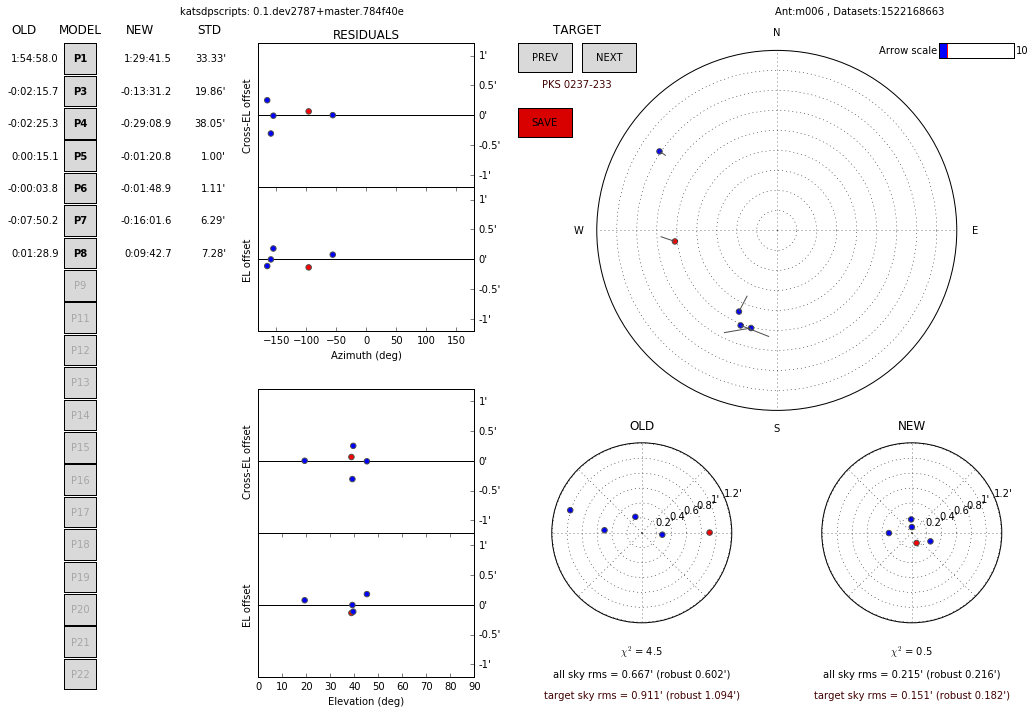

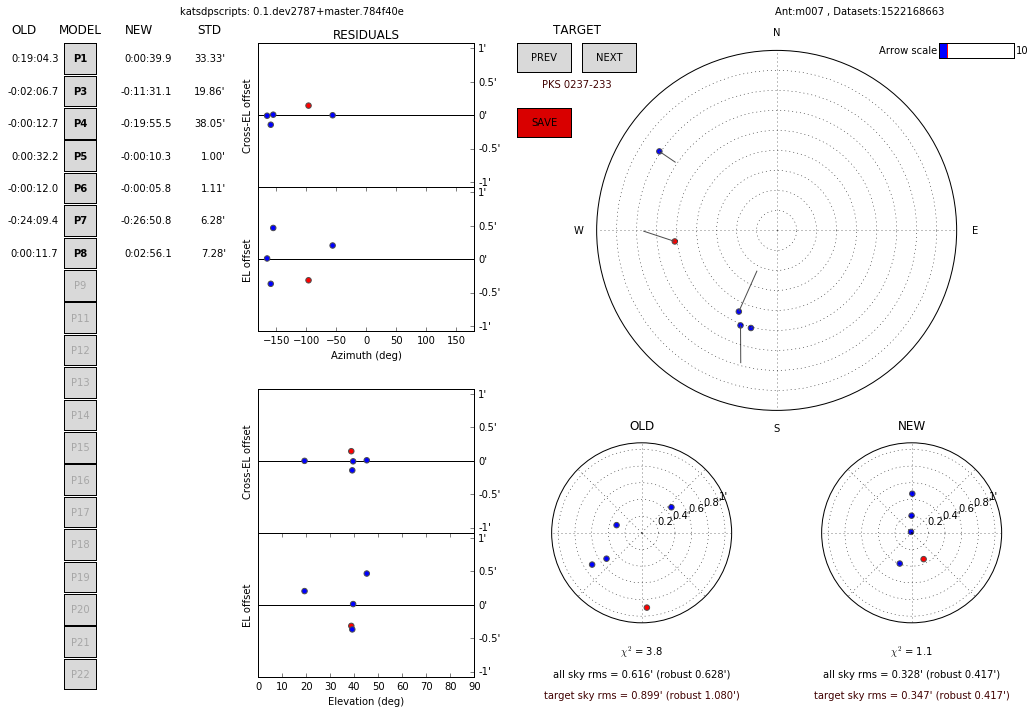

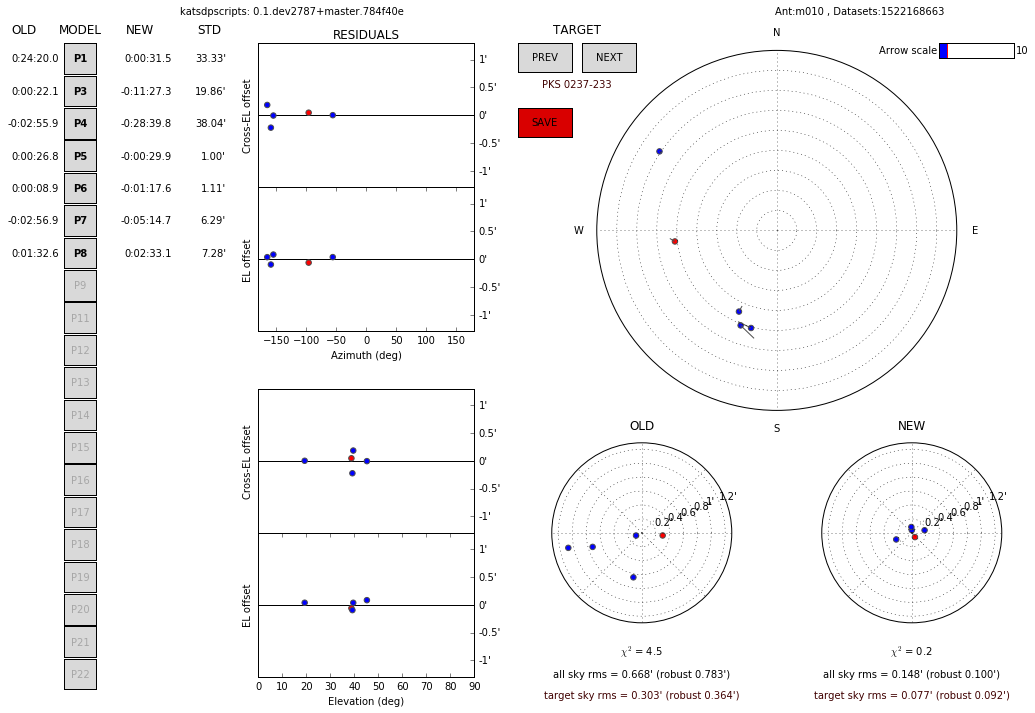

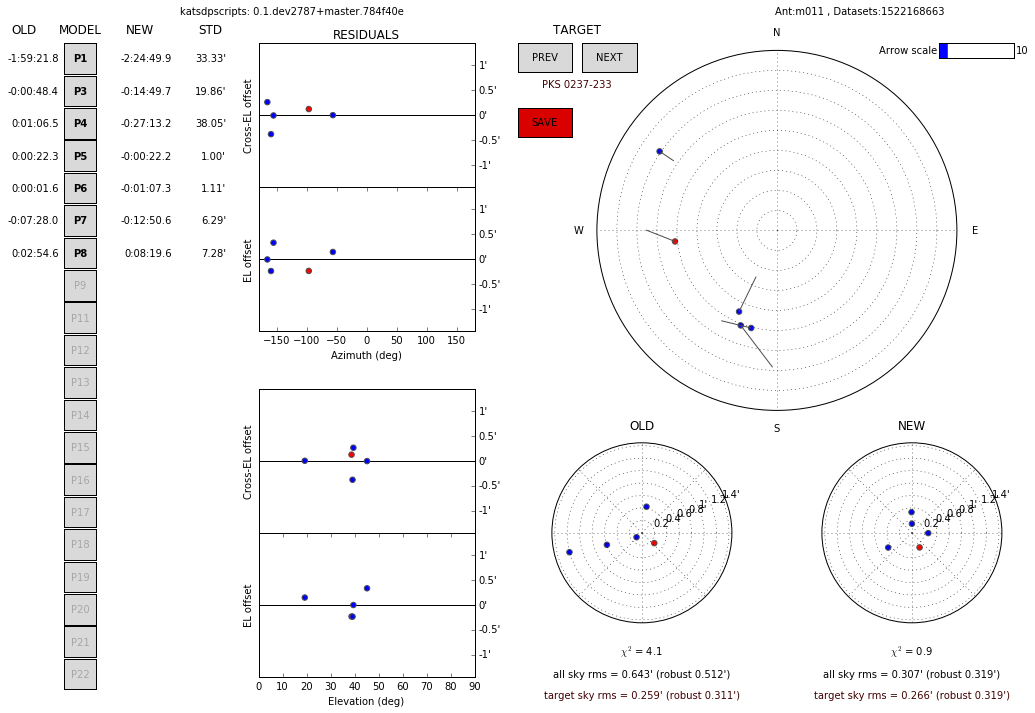

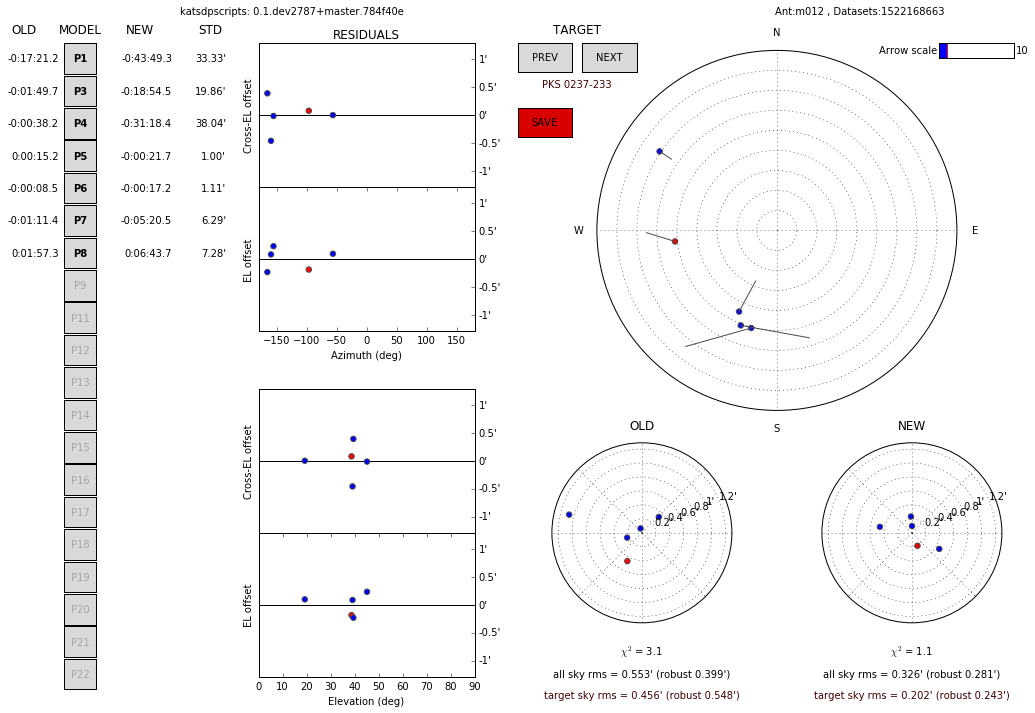

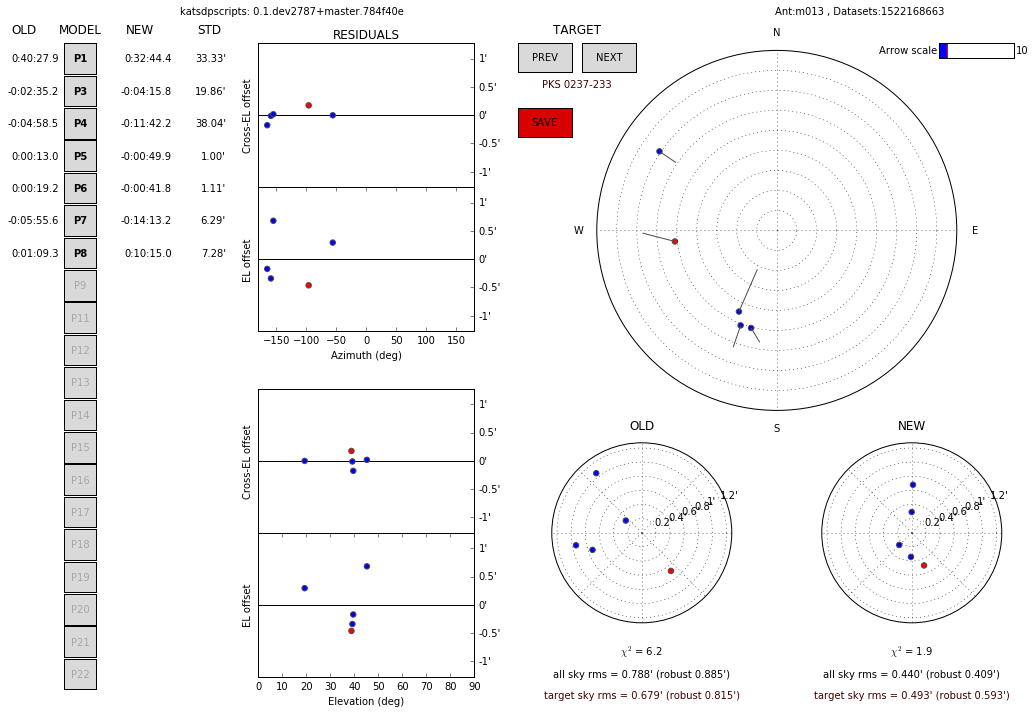

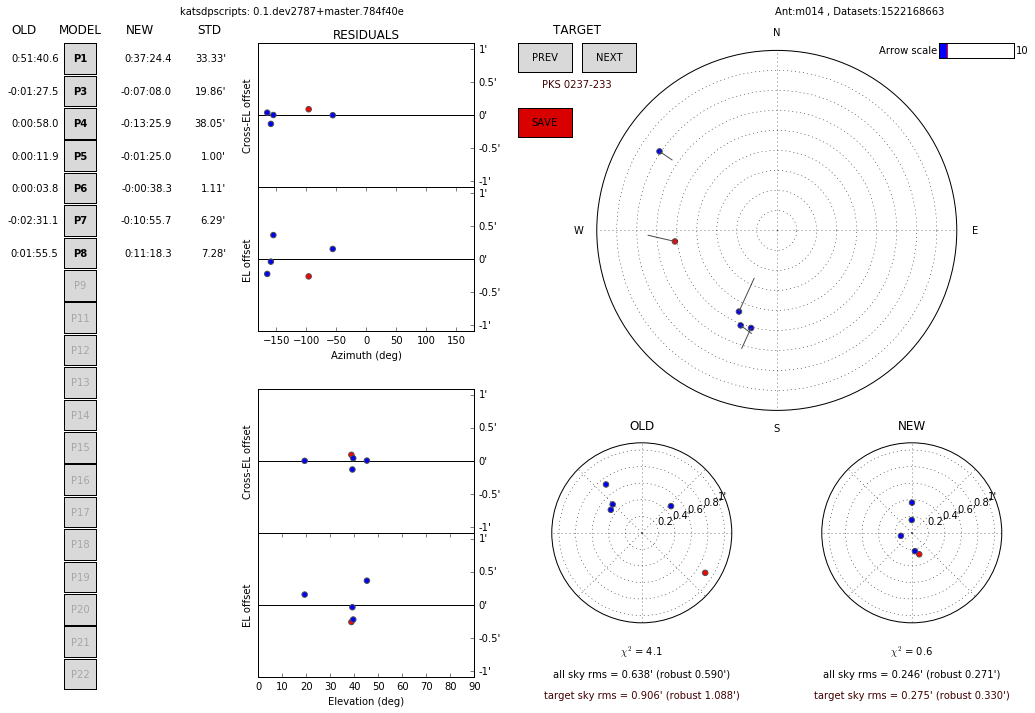

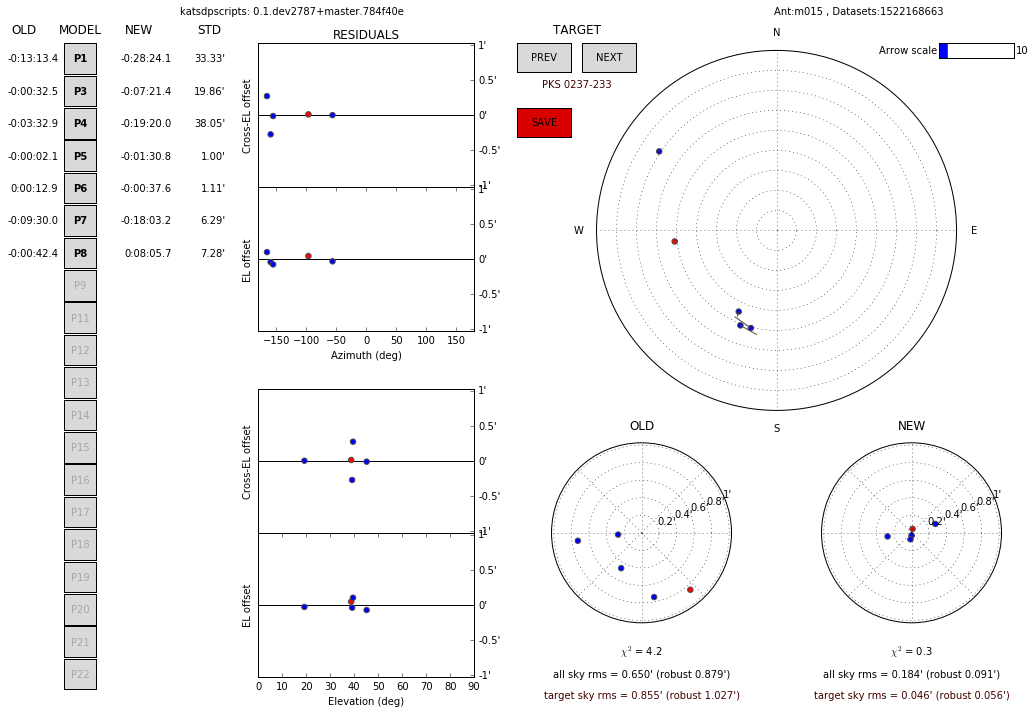

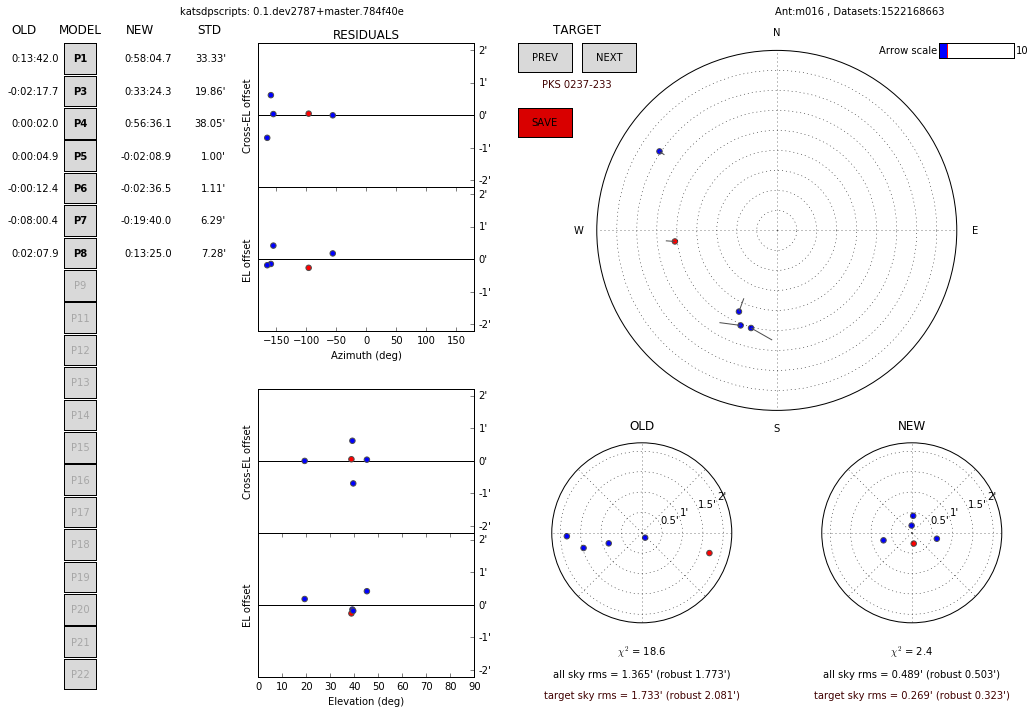

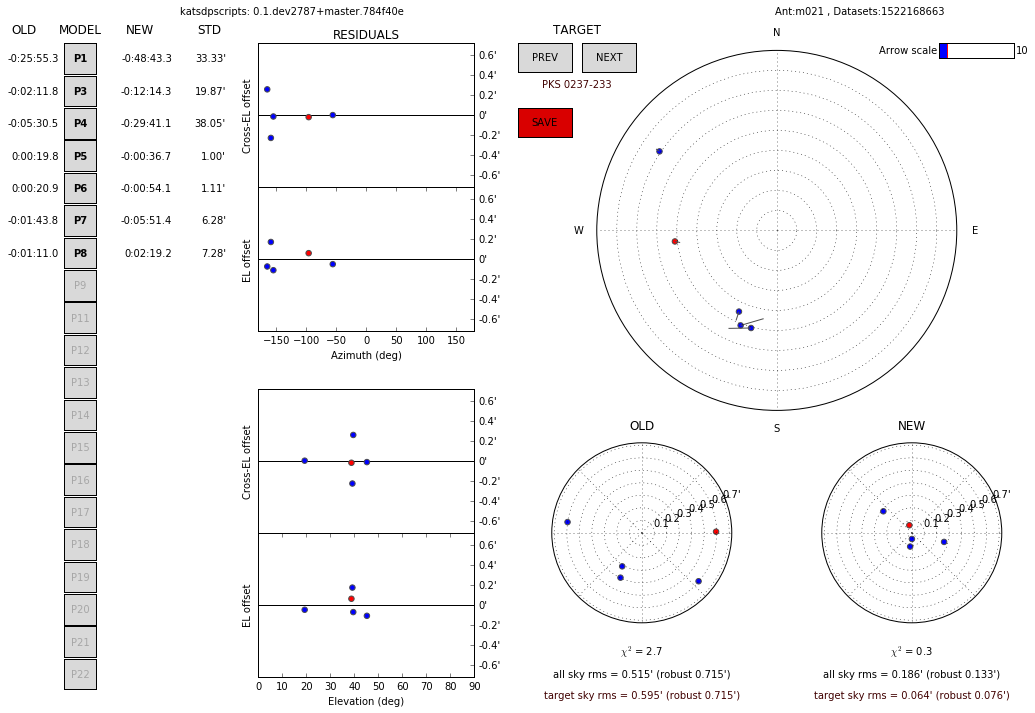

In [16]:
for fl in sorted(gl):
    figure(figsize=[15.0,10.0])
    %run /var/kat/katsdpscripts/reduction/fit_pointing_model.py -m 1.0 $fl
    